<a href="https://colab.research.google.com/github/rakhmiddin93/Computer-Vision/blob/main/CNN/dog-and-cats/dog%20and%20cats%20simple%20Sequential%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns
import pathlib

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True) 

In [ ]:
!wget -O dog_and_cat.zip https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-04-26 19:58:05--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.55.184.113, 2600:1409:3000:293::e59, 2600:1409:3000:284::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.55.184.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘dog_and_cat.zip’

dog_and_cat.zip     100%[===================>] 786.68M   180MB/s    in 4.4s    

2022-04-26 19:58:09 (179 MB/s) - ‘dog_and_cat.zip’ saved [824894548/824894548]



In [ ]:
!unzip dog_and_cat.zip

In [ ]:
path = pathlib.Path('/content/PetImages')

In [ ]:
path

PosixPath('/content/PetImages')

In [ ]:
path_list = list(path.glob(r'**/*.jpg'))

In [ ]:
path_list[:5]

[PosixPath('/content/PetImages/Dog/3448.jpg'),
 PosixPath('/content/PetImages/Dog/150.jpg'),
 PosixPath('/content/PetImages/Dog/7717.jpg'),
 PosixPath('/content/PetImages/Dog/8332.jpg'),
 PosixPath('/content/PetImages/Dog/667.jpg')]

In [ ]:
test = path_list[:100] + path_list[-100:]

In [ ]:
dataset = []
label = []

In [ ]:
for p in path_list:
    img = cv2.imread(str(p))
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        continue
    img = cv2.resize(img, (80,80))
    img = img/255.0
    if "Cat" in str(p):
        dataset.append(img)
        label.append(0)
    else:
        dataset.append(img)
        label.append(1)

In [ ]:
dataset = np.array(dataset)

In [ ]:
print(dataset.shape)

(24946, 80, 80, 3)


In [ ]:
X = dataset
y = label

In [ ]:
print(y[-5:])
print(y[:5])

In [ ]:
plt.imshow(X[0])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [ ]:
print(y_train[:5])

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[80,80,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 48672)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               6230144   
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 6,231,298
Trainable params: 6,231,298
Non-trainable params: 0
____________________________________________

In [ ]:
history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 158ms/step - loss: 1.5036 - accuracy: 0.4500 - val_loss: 1.2432 - val_accuracy: 0.4833
Epoch 2/10
5/5 [==============================] - 1s 135ms/step - loss: 0.8767 - accuracy: 0.5071 - val_loss: 0.7306 - val_accuracy: 0.5167
Epoch 3/10
5/5 [==============================] - 1s 129ms/step - loss: 0.7071 - accuracy: 0.5714 - val_loss: 0.7264 - val_accuracy: 0.5167
Epoch 4/10
5/5 [==============================] - 1s 125ms/step - loss: 0.6938 - accuracy: 0.5071 - val_loss: 0.6931 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 1s 131ms/step - loss: 0.6139 - accuracy: 0.7429 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 1s 126ms/step - loss: 0.5530 - accuracy: 0.7143 - val_loss: 0.6741 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 1s 242ms/step - loss: 0.5046 - accuracy: 0.9500 - val_loss: 0.6698 - val_accuracy: 0.5500
Epoch 8/10
5/5 [====

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(10)

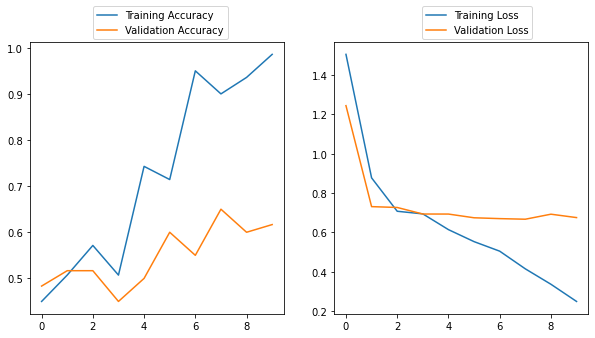

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [ ]:
cnn.evaluate(x_test,y_test)

2/2 [==============================] - 0s 40ms/step - loss: 0.6750 - accuracy: 0.6167


[0.6750191450119019, 0.6166666746139526]

In [ ]:
y_hat = cnn.predict(x_test)

In [ ]:
print(y_test[0])
print(y_hat[0])

tf.Tensor([1. 0.], shape=(2,), dtype=float32)
[0.7913397 0.1301673]


In [ ]:
labels = np.argmax(y_test, axis=1)
predictions = np.argmax(y_hat, axis=1)

In [ ]:
print(y_hat.shape)
print(predictions.shape)

(60, 2)
(60,)


In [ ]:
print(labels[:5])
print(predictions[:5])

[0 0 0 1 1]
[0 0 0 1 1]


In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels, predictions)

In [ ]:
confusion_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[26,  5],
       [18, 11]], dtype=int32)>

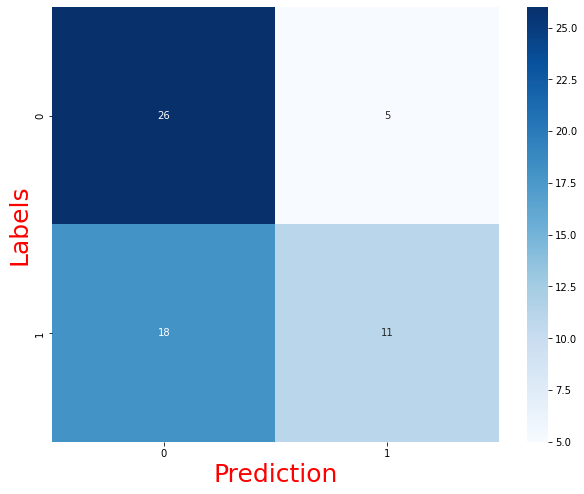

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='')
plt.xlabel('Prediction', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()

In [ ]:
Label = []
for i in range(len(labels)):
    if labels[i] == 0:
        Label.append('Cat')
    else:
        Label.append('Dog')

In [ ]:
Prediction = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        Prediction.append('Cat')
    else:
        Prediction.append('Dog')

In [ ]:
print(Label[:2])
print(Prediction[:2])

['Cat', 'Cat']
['Cat', 'Cat']


16


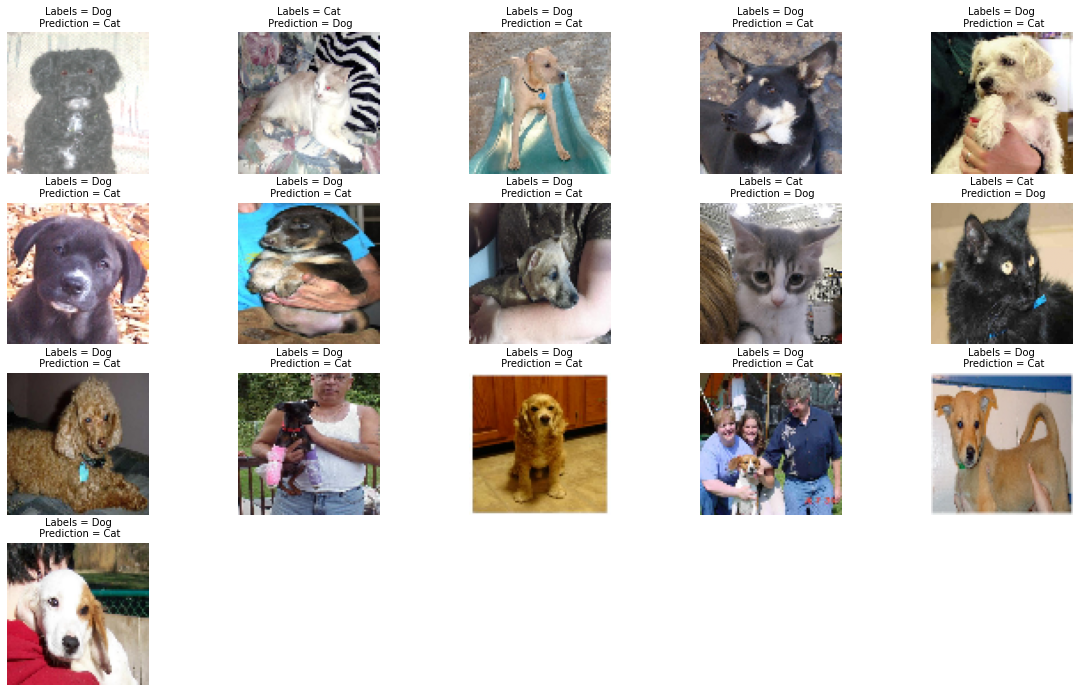

In [ ]:
plt.figure(figsize=(20,12))
n = 50
j=0
for i in range(n):
    if labels[i] != predictions[i]:
        img = x_test[i]
        plt.subplot(3,4,j+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Labels = {Label[i]}\n Prediction = {Prediction[i]}', fontsize=10)
        plt.axis('off')
        j+=1
print(j)
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
j=0
for i in range(len(y_test)):
    if labels[i] != predictions[i]:
        j+=1
print('Number of Losses', j)

Number of Losses 23


<Figure size 1440x864 with 0 Axes>